In [1]:
import pandas as pd

# Load the merged CSV file
file_path = r'C:\Users\jesse\Desktop\Master Thesis\02_Experiments_with_Answers\Merged_Have_Babies.csv'
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Display the first few rows of the DataFrame to verify the data has been loaded successfully
df.head()


,问题id,页码,答主昵称,答主性别,答主粉丝数,答主主页,答主签名,回答id,回答时间,评论数,点赞数,喜欢数,回答内容
0,23132109,1,Andy Lee,男,270600,https://www.zhihu.com/people/andy-lee-60,《思想实验》《逻辑女孩》《逻辑学的语言》《思维的利剑》的作者,122351336,9/17/2016 08:28,46,151,47,这个问题问得太棒了！女人为什么要生孩子？不同于男人为什么要生孩子。生孩子对于女人来说成本更大...
1,23132109,1,林策筝,女,1720,https://www.zhihu.com/people/bluepine,平权主义者 INFP 音乐 电影 文学 心理学 科技爱好者,32897656,11/4/2014 06:39,172,352,97,这显然是男权社会的谎言和骗局，先是宣扬男性的肯定是女性价值的基础，没人要的“剩女”是可怕的，...
2,23132109,1,李七凡,女,29132,https://www.zhihu.com/people/gu-yun-96-60,想要当作家的语言爱好者。,117817186,8/19/2016 19:54,90,78,19,首先呢，女人生孩子，是因为女人可以。这确实是由生物性决定的。但是我并不认为这是“义务”，而是...
3,23132109,1,匿名用户,男,0,https://www.zhihu.com/people/,NaN,33935345,11/24/2014 11:29,6,66,12,自己想生，才生。是女人的自由。别人说该生就生，是女人的桎梏
4,23132109,1,一语道出真相,女,207,https://www.zhihu.com/people/holiday-wong-39,记录心路和实践历程。,109257777,7/4/2016 06:22,10,40,7,我面对父母高压的“什么年纪干什么事儿”都顽固的不谈恋爱不结婚，就是怕开了这个头，下一个“什么...


In [2]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Remove duplicate rows
df = df.drop_duplicates()

# Display the shape of the DataFrame before and after removing duplicates
print("Shape of DataFrame before removing duplicates:", df.shape)
print("Shape of DataFrame after removing duplicates:", df.drop_duplicates().shape)


Shape of DataFrame before removing duplicates: (108, 13)
Shape of DataFrame after removing duplicates: (108, 13)


In [3]:
# Convert text to lowercase(Not necessary but just in case some answers are in English or French and etc.)
df['回答内容'] = df['回答内容'].str.lower()

# Remove special characters and HTML tags
df['回答内容'] = df['回答内容'].str.replace(r'<[^>]+>', '')  # Remove HTML tags
df['回答内容'] = df['回答内容'].str.replace(r'[^a-zA-Z0-9\u4e00-\u9fa5\s]', '')  # Remove special characters except Chinese characters, alphanumeric characters, and whitespace

# Display the cleaned DataFrame
df.head()


,问题id,页码,答主昵称,答主性别,答主粉丝数,答主主页,答主签名,回答id,回答时间,评论数,点赞数,喜欢数,回答内容
0,23132109,1,Andy Lee,男,270600,https://www.zhihu.com/people/andy-lee-60,《思想实验》《逻辑女孩》《逻辑学的语言》《思维的利剑》的作者,122351336,9/17/2016 08:28,46,151,47,这个问题问得太棒了！女人为什么要生孩子？不同于男人为什么要生孩子。生孩子对于女人来说成本更大...
1,23132109,1,林策筝,女,1720,https://www.zhihu.com/people/bluepine,平权主义者 INFP 音乐 电影 文学 心理学 科技爱好者,32897656,11/4/2014 06:39,172,352,97,这显然是男权社会的谎言和骗局，先是宣扬男性的肯定是女性价值的基础，没人要的“剩女”是可怕的，...
2,23132109,1,李七凡,女,29132,https://www.zhihu.com/people/gu-yun-96-60,想要当作家的语言爱好者。,117817186,8/19/2016 19:54,90,78,19,首先呢，女人生孩子，是因为女人可以。这确实是由生物性决定的。但是我并不认为这是“义务”，而是...
3,23132109,1,匿名用户,男,0,https://www.zhihu.com/people/,NaN,33935345,11/24/2014 11:29,6,66,12,自己想生，才生。是女人的自由。别人说该生就生，是女人的桎梏
4,23132109,1,一语道出真相,女,207,https://www.zhihu.com/people/holiday-wong-39,记录心路和实践历程。,109257777,7/4/2016 06:22,10,40,7,我面对父母高压的“什么年纪干什么事儿”都顽固的不谈恋爱不结婚，就是怕开了这个头，下一个“什么...


In [4]:
import re
import jieba

# Define a list of stop words
stop_words = set([
    '的', '了', '是', '在', '这', '个', '我', '我们', '你', '你们', '他', '她', '它', '他们', '她们', '它们', 
    '那', '那个', '那些', '这个', '这些', '一', '一些', '一切', '一样', '每', '每个', '每样', '所有', '全部', 
    '总是', '总之', '总的来看', '总的来说', '总的说来', '总之', '总而言之', '所以', '因此', '因而', '因为', '所以', 
    '故', '因', '由于', '就是', '即使', '尽管', '但是', '但', '然而', '却', '不过', '虽然', '尽管', '尽管如此', 
    '而', '而且', '而是', '而言', '或者', '或', '要么', '无论', '无论如何', '不管', '即使', '就算', '甚至', '以至于', 
    '以至', '以便', '以便于', '为了', '所以', '因此', '因为', '由于', '所以', '所以', '不仅', '不仅仅', '不只', '不但', 
    '但是', '然而', '却', '虽然', '尽管', '即使', '即便', '尽管如此', '无论', '无论如何', '不管', '一旦', '只要', '只有', 
    '只要', '只要是', '只要', '只要', '只有', '因为', '因为', '由于', '既然', '反正', '由于', '因为', '只要', '只有', '既然', 
    '不论', '不管', '即使', '尽管', '只要', '只有', '只要', '既然', '不管', '就是', '即使', '尽管', '纵然', '就算', '就是', '可是', 
    '虽说', '例如', '比方说', '譬如', '比如', '比如说', '诸如', '诸如此类'
])

# Function to tokenize text, remove punctuation marks, and stop words
def tokenize_and_remove_stopwords(text):
    # Tokenize the text using Jieba
    tokens = jieba.lcut(text)
    # Remove punctuation marks using regular expression
    tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    # Remove stop words
    tokens = [token for token in tokens if token.strip() and token not in stop_words]
    return tokens

# Drop rows with missing values in the '回答内容' column
df.dropna(subset=['回答内容'], inplace=True)

# Tokenize the text, remove punctuation marks, and stop words
df['tokenized_content'] = df['回答内容'].apply(tokenize_and_remove_stopwords)

# Display the tokenized content
print(df['tokenized_content'].head())



Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jesse\AppData\Local\Temp\jieba.cache
Loading model cost 0.539 seconds.
Prefix dict has been built successfully.


0    [问题, 问得, 太棒了, 女人, 为什么, 要生, 孩子, 不同于, 男人, 为什么, 要...
1    [显然, 男权, 社会, 谎言, 和, 骗局, 先是, 宣扬, 男性, 肯定, 女性, 价值...
2    [首先, 呢, 女人, 生, 孩子, 是因为, 女人, 可以, 确实, 由, 生物性, 决定...
3        [自己, 想生, 才生, 女人, 自由, 别人, 说, 该, 生就, 生, 女人, 桎梏]
4    [面对, 父母, 高压, 什么, 年纪, 干什么, 事儿, 都, 顽固, 不, 谈恋爱, 不...
Name: tokenized_content, dtype: object


In [5]:
# Save the dataframe to current directory (it would utilize too much memory otherwise)
output_file_path = "C:/Users/jesse/Desktop/Master Thesis/02_Experiments_with_Answers/Merged_Have_Babies_Tokenized.csv"

# Write the DataFrame to a CSV file
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print("DataFrame with tokenized content has been saved to:", output_file_path)


DataFrame with tokenized content has been saved to: C:/Users/jesse/Desktop/Master Thesis/02_Experiments_with_Answers/Merged_Have_Babies_Tokenized.csv


In [6]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.nn.functional import softmax
import time

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

# Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-chinese', num_labels=3)  # Assuming 3 labels: positive, negative, neutral

# Load your tokenized text data
file_path = output_file_path
df = pd.read_csv(file_path, encoding='utf-8-sig')

# Define a function to perform sentiment analysis using BERT
def bert_sentiment_analysis(text):
    # Tokenize the text and convert it into input IDs
    input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=512, truncation=True, padding='max_length')
    input_ids_tensor = torch.tensor([input_ids])

    # Perform forward pass to get logits
    with torch.no_grad():
        outputs = model(input_ids_tensor)
        logits = outputs.logits

    # Apply softmax to convert logits to probabilities
    probabilities = softmax(logits, dim=1).squeeze().tolist()
    
    # Determine the sentiment label based on the highest probability
    sentiment_label = ['Positive', 'Negative', 'Neutral'][probabilities.index(max(probabilities))]
    
    return probabilities, sentiment_label

# Measure the start time
start_time = time.time()

# Apply sentiment analysis function to the tokenized content
df['sentiment_probs'], df['sentiment_label'] = zip(*df['tokenized_content'].apply(bert_sentiment_analysis))

# Measure the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

# Display the DataFrame with sentiment probabilities and labels
print(df[['tokenized_content', 'sentiment_probs', 'sentiment_label']].head())


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Time elapsed: 50.645816802978516 seconds
                                   tokenized_content  \
0  ['问题', '问得', '太棒了', '女人', '为什么', '要生', '孩子', '...   
1  ['显然', '男权', '社会', '谎言', '和', '骗局', '先是', '宣扬'...   
2  ['首先', '呢', '女人', '生', '孩子', '是因为', '女人', '可以'...   
3  ['自己', '想生', '才生', '女人', '自由', '别人', '说', '该',...   
4  ['面对', '父母', '高压', '什么', '年纪', '干什么', '事儿', '都...   

                                     sentiment_probs sentiment_label  
0  [0.4741664230823517, 0.28533217310905457, 0.24...        Positive  
1  [0.48966100811958313, 0.28870105743408203, 0.2...        Positive  
2  [0.5381145477294922, 0.25576502084732056, 0.20...        Positive  
3  [0.0726780816912651, 0.15422560274600983, 0.77...         Neutral  
4  [0.4768322706222534, 0.30968254804611206, 0.21...        Positive  


In [7]:
# Save the dataframe to current directory (it would utilize too much memory otherwise)
output_file_path = "C:/Users/jesse/Desktop/Master Thesis/02_Experiments_with_Answers/Merged_Have_Babies_Tokenized_Sent.csv"

# Write the DataFrame to a CSV file
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print("DataFrame with tokenized content after sentiment analysis has been saved to:", output_file_path)


DataFrame with tokenized content after sentiment analysis has been saved to: C:/Users/jesse/Desktop/Master Thesis/02_Experiments_with_Answers/Merged_Have_Babies_Tokenized_Sent.csv


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Join all the items in 'tokenized_content' together as a list of strings
tokenized_docs = df['tokenized_content'].apply(lambda x: ' '.join(x)).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,,',",",0,1,2,3,4,5,[,...,面,顺,须,顾,题,风,首,验,高,龄
0,3317,962,480,0,0,0,0,0,0,1,...,0,0,1,3,4,1,1,1,5,0
1,1712,500,249,0,0,0,0,0,0,1,...,0,0,0,0,1,2,0,0,0,1
2,3661,1074,536,0,1,1,1,0,0,1,...,7,1,3,9,1,2,1,0,1,0
3,79,24,11,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1209,360,179,2,2,0,0,0,0,1,...,4,0,0,0,0,0,0,0,1,0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

# Define a function to preprocess and join tokenized content
def preprocess_and_join(tokens):
    # Join tokens into a single string
    joined_str = ' '.join(tokens)
    # Remove unwanted characters using regular expression
    cleaned_str = re.sub(r'[\[\],\'\s]+', '', joined_str)
    return cleaned_str

# Apply preprocessing and join tokenized content, then convert to list
tokenized_docs = df['tokenized_content'].apply(preprocess_and_join).tolist()

# Initialize CountVectorizer with appropriate parameters for Chinese text
# Ensure that max_df is greater than or equal to min_df
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut, min_df=5)

# Fit and transform the list of tokenized documents to create the Document-Term Matrix (DTM)
dtm = count_vectorizer.fit_transform(tokenized_docs)

# Display the DTM
dtm_df = pd.DataFrame(dtm.toarray(), columns=count_vectorizer.get_feature_names_out())
dtm_df.head()


C:\Users\jesse\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,1,2,3,一下,一个,一代,一件,一定,一次,一直,...,里,重要,问,问题,需要,非常,面对,风险,首先,高
0,0,0,0,0,7,0,1,0,0,0,...,0,0,0,4,3,0,0,1,1,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,0
2,1,1,1,0,6,0,0,0,0,0,...,0,0,0,1,1,4,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Compute TF-IDF scores for the DTM
tfidf_matrix = tfidf_transformer.fit_transform(dtm)

# Convert the TF-IDF matrix to a DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the TF-IDF matrix (optional)
print(tfidf_df.head())


          1        2         3   一下        一个   一代        一件   一定   一次   一直  \
0  0.000000  0.00000  0.000000  0.0  0.134628  0.0  0.036596  0.0  0.0  0.0   
1  0.000000  0.00000  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0   
2  0.033517  0.03465  0.035934  0.0  0.117984  0.0  0.000000  0.0  0.0  0.0   
3  0.000000  0.00000  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.0   
4  0.000000  0.00000  0.000000  0.0  0.160455  0.0  0.000000  0.0  0.0  0.0   

   ...    里   重要    问        问题        需要        非常        面对        风险  \
0  ...  0.0  0.0  0.0  0.095822  0.083929  0.000000  0.000000  0.036596   
1  ...  0.0  0.0  0.0  0.048381  0.000000  0.000000  0.000000  0.147818   
2  ...  0.0  0.0  0.0  0.024493  0.028604  0.130015  0.000000  0.037417   
3  ...  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
4  ...  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.195478  0.000000   

         首先         高  
0  0.032782  0.109787  
1  0.000000  0.000000  
2 

In [11]:
# Compute document-level TF-IDF scores by summing TF-IDF scores for each term within each document
document_tfidf_scores = tfidf_matrix.sum(axis=1)

# Convert the document-level TF-IDF scores to a DataFrame for better visualization
document_tfidf_df = pd.DataFrame(document_tfidf_scores, columns=["TF-IDF Score"])

# Add a column to the DataFrame to indicate the document index or ID
document_tfidf_df["Document Index"] = df.index

# Display the document-level TF-IDF scores
print(document_tfidf_df.head())


   TF-IDF Score  Document Index
0      7.831132               0
1      7.483277               1
2      9.251071               2
3      2.573894               3
4      7.093446               4


In [12]:
# Identify the top N important terms in each document based on TF-IDF scores
top_n_terms_per_document = 5  # Change this value as needed
top_terms_per_document = []

for document_index in range(len(df)):
    # Get the TF-IDF scores for the current document
    tfidf_scores = tfidf_matrix[document_index].toarray()[0]
    # Get the indices of the top N terms based on TF-IDF scores
    top_term_indices = tfidf_scores.argsort()[-top_n_terms_per_document:][::-1]
    # Get the actual terms from the CountVectorizer
    top_terms = [count_vectorizer.get_feature_names_out()[index] for index in top_term_indices]
    # Append the top terms to the list
    top_terms_per_document.append(top_terms)

# Add the top terms to the DataFrame
document_tfidf_df["Top Terms"] = top_terms_per_document

# Display the DataFrame with document-level TF-IDF scores and top terms
print(document_tfidf_df.head())

   TF-IDF Score  Document Index             Top Terms
0      7.831132               0  [女性, 孩子, 社会, 可以, 对于]
1      7.483277               1    [母亲, 和, 女性, 用, 丈夫]
2      9.251071               2  [女性, 照顾, 孩子, 本能, 很多]
3      2.573894               3    [女人, 自由, 生, 才, 别人]
4      7.093446               4    [别人, 给, 应该, 岁, 年纪]


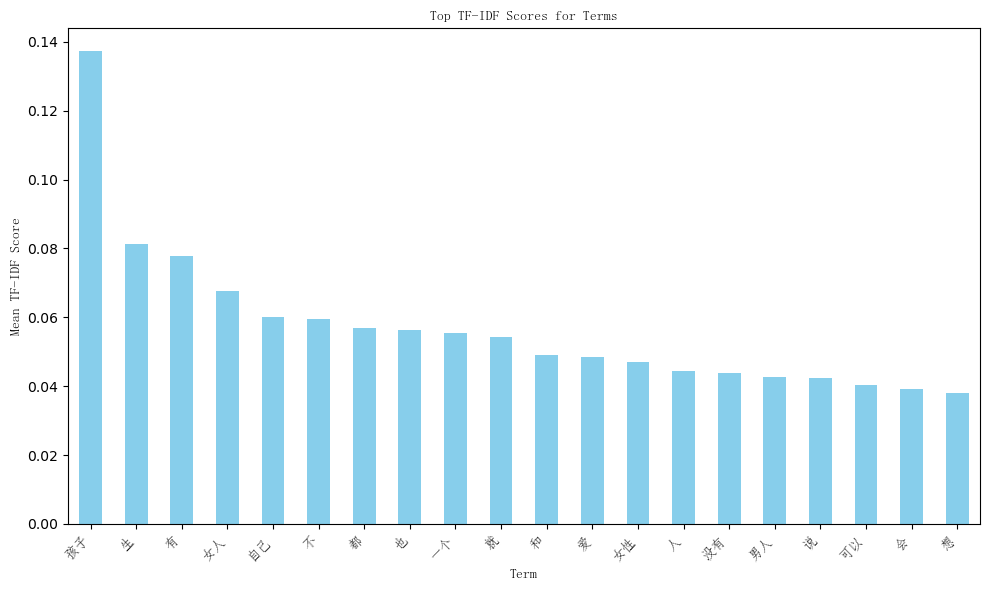

In [13]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Calculate mean TF-IDF scores for each term across all documents
mean_tfidf_scores = tfidf_df.mean(axis=0)

# Sort terms based on mean TF-IDF scores in descending order
sorted_terms = mean_tfidf_scores.sort_values(ascending=False)

# Select top N terms to visualize
top_n = 20  # You can adjust this value as needed
top_terms = sorted_terms[:top_n]

# Specify the path to the SimFang font file
font_path = r'C:\Users\jesse\Desktop\Master Thesis\02_Experiments_with_Answers\Fonts\simfang.ttf'

# Register the SimFang font with Matplotlib
custom_font = FontProperties(fname=font_path)

# Plot bar chart with custom font
plt.figure(figsize=(10, 6))
top_terms.plot(kind='bar', color='skyblue')
plt.title('Top TF-IDF Scores for Terms', fontproperties=custom_font)
plt.xlabel('Term', fontproperties=custom_font)
plt.ylabel('Mean TF-IDF Score', fontproperties=custom_font)
plt.xticks(rotation=45, ha='right', fontproperties=custom_font)
plt.tight_layout()
plt.show()

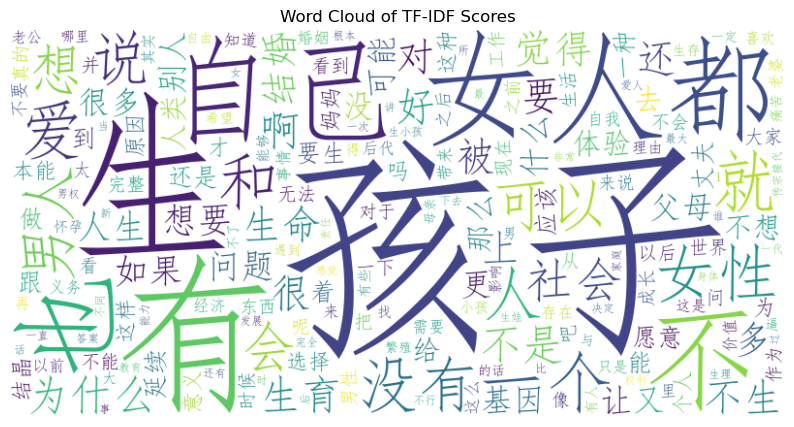

In [14]:
from wordcloud import WordCloud

# Generate word cloud with custom font
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(mean_tfidf_scores)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of TF-IDF Scores')
plt.axis('off')
plt.show()

In [15]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA model to the DTM
lda_output = lda_model.fit_transform(dtm)

# Display the shape of the LDA output
print("Shape of LDA output:", lda_output.shape)

# Display the LDA model
print(lda_model)


Shape of LDA output: (107, 5)
LatentDirichletAllocation(n_components=5, random_state=42)


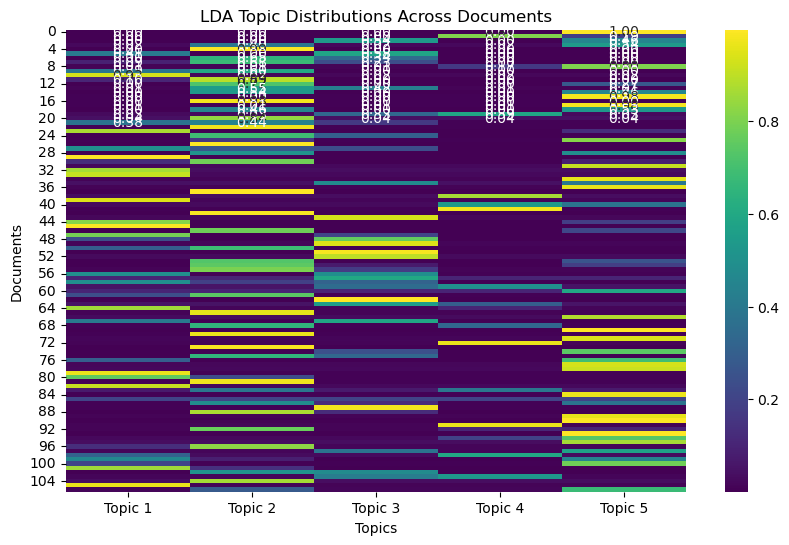

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the topic distributions
plt.figure(figsize=(10, 6))
sns.heatmap(lda_output, cmap='viridis', annot=True, fmt=".2f", xticklabels=[f"Topic {i}" for i in range(1, num_topics+1)])
plt.title('LDA Topic Distributions Across Documents')
plt.xlabel('Topics')
plt.ylabel('Documents')
plt.show()


In [24]:
from gensim.corpora import Dictionary

# Reverse the mapping from count_vectorizer vocabulary
id2word = {index: word for word, index in count_vectorizer.vocabulary_.items()}

# Create a corpus-like structure from CountVectorizer vocabulary
corpus_list = [[(index, 1)] for index in range(len(count_vectorizer.vocabulary_))]

# Convert Python dictionary to gensim Dictionary
gensim_dictionary = Dictionary.from_corpus(corpus_list, id2word=id2word)

# Convert scikit-learn DTM to gensim corpus
corpus = matutils.Sparse2Corpus(dtm.T)

# Convert scikit-learn LDA model to gensim-compatible format
num_topics = lda_model.n_components
lda_model_gensim = LdaModel(
    corpus=corpus,
    id2word=gensim_dictionary,
    num_topics=num_topics
)

# Visualize the LDA model using pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis_data = pyLDAvis.gensim.prepare(lda_model_gensim, corpus, gensim_dictionary)
pyLDAvis.display(vis_data)
